# Outliers

### Detection
#### 1. Distribution test for normally distributed data
#### 2. IQR test for skewed data
#### 3. Percentile test

In [1]:
## Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
# loading dataset
df = pd.read_csv("titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Let's take two numerical fatures
# Age, Feare

In [5]:
df[["Age", "Fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
# checkign the distribution

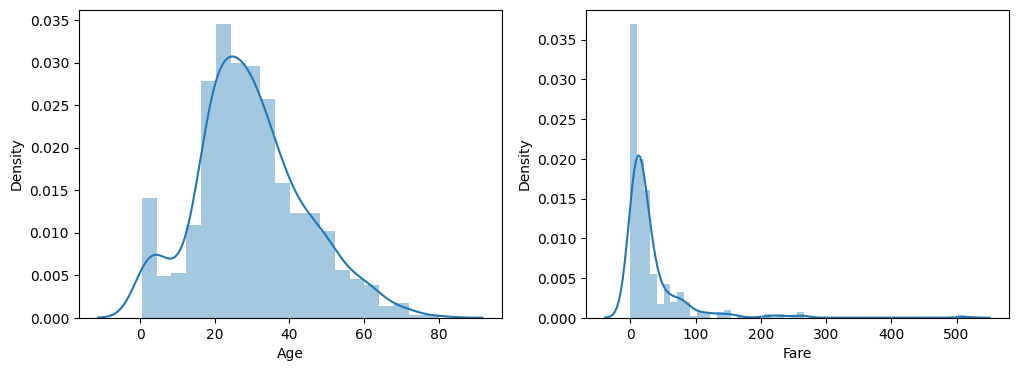

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df["Age"])

plt.subplot(1,2,2)
sns.distplot(df["Fare"])

plt.show()

In [8]:
# Scatter plot between age and fare

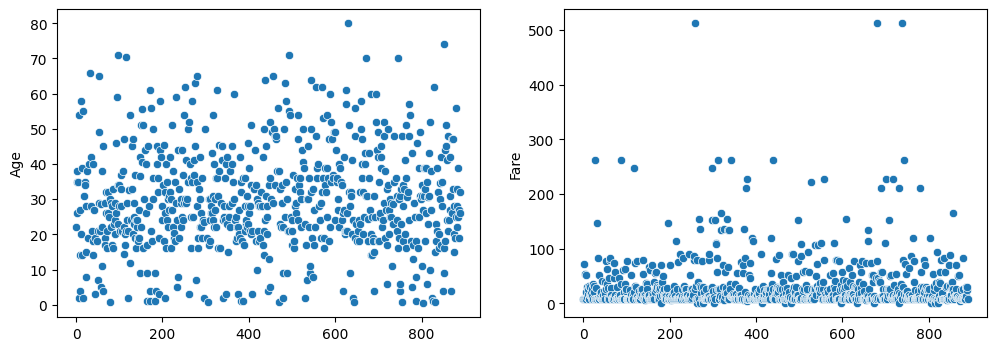

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(df["Age"])

plt.subplot(1,2,2)
sns.scatterplot(df["Fare"])

plt.show()

In [10]:
# Finding the skeweness of features

In [11]:
df["Age"].skew(), df["Fare"].skew()

(0.38910778230082704, 4.787316519674893)

## 1. Distribution [z-score test]

In [12]:
# Apply Z-score test for Age and check outliers

In [13]:
new_df = df[["Age", "Fare"]]

In [14]:
# Finding the boundary values
print("Highest allowed",df['Age'].mean() + 3*df['Age'].std())
print("Lowest allowed",df['Age'].mean() - 3*df['Age'].std())

Highest allowed 73.27860964406094
Lowest allowed -13.880374349943303


In [15]:
# Finding the outliers
new_df[(new_df['Age'] > 74) | (new_df['Age'] < 0)]

,Age,Fare
630,80.0,30.0


## Trimming

In [16]:
## Approach -1
## filtering 

In [17]:
after_trimed_df = new_df[(new_df["Age"] < 74) & (new_df["Age"] > 0)]

In [18]:
new_df.shape, after_trimed_df.shape

((891, 2), (712, 2))

In [19]:
## Approach -2
## filtering using z-score


In [20]:
# Calculating Z-score

In [21]:
new_df["age_zscore"] = (new_df["Age"] - new_df["Age"].mean()) / new_df["Age"].std()

In [22]:
new_df.head()

,Age,Fare,age_zscore
0,22.0,7.2500,-0.530005
1,38.0,71.2833,0.571430
2,26.0,7.9250,-0.254646
3,35.0,53.1000,0.364911
4,35.0,8.0500,0.364911


In [23]:
# Finding outliers
new_df[(new_df["age_zscore"] > 3) | (new_df["age_zscore"] < -3)]

,Age,Fare,age_zscore
630,80.0,30.000,3.462699
851,74.0,7.775,3.049660


In [24]:
# Filtering rows having z-score having greater then 3

In [25]:
z_scored_filterd_df = new_df[(new_df["age_zscore"] < 3) & (new_df["age_zscore"] > -3)]

In [26]:
z_scored_filterd_df.shape

(712, 3)

## Capping

In [27]:
## Replacing outliers with upper and lower limit

In [28]:
upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()

In [29]:
upper_limit, lower_limit

(73.27860964406094, -13.880374349943303)

In [30]:
# capping

In [31]:
new_df["Age"] = np.where(
    df["Age"] > upper_limit,
    upper_limit,
    df["Age"]
)

In [32]:
new_df["Age"] = np.where(
    df["Age"] < lower_limit,
    lower_limit,
    df["Age"]
)

In [33]:
# After Capping

In [34]:
new_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## 2. IQR test

In [35]:
new_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot: xlabel='Fare'>

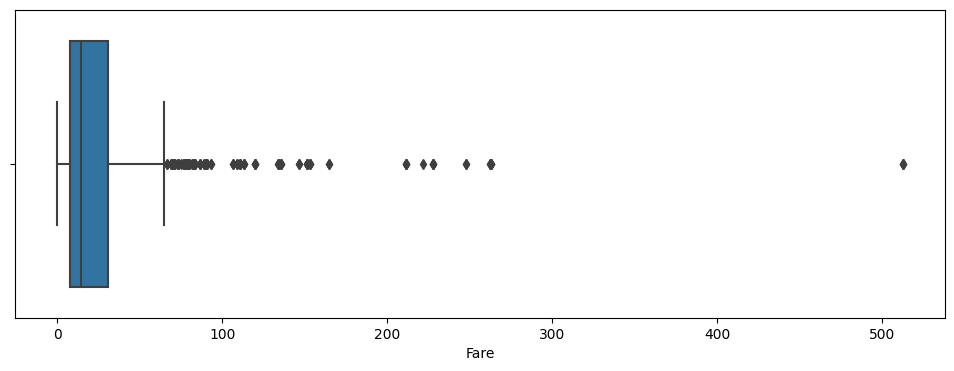

In [39]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['Fare'])

In [40]:
# Finding the IQR
percentile25 = df['Fare'].quantile(0.25)
percentile75 = df['Fare'].quantile(0.75)

In [41]:
percentile25, percentile75

(7.9104, 31.0)

In [42]:
iqr = percentile75 - percentile25

In [43]:
iqr

23.0896

In [44]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [45]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 65.6344
Lower limit -26.724


In [46]:
## Finding Outliers

In [52]:
new_df[(new_df["Fare"] > upper_limit) | (new_df["Fare"] < lower_limit)]

,Age,Fare,age_zscore
1,38.0,71.2833,0.571430
27,19.0,263.0000,-0.736524
31,NaN,146.5208,NaN
34,28.0,82.1708,-0.116967
52,49.0,76.7292,1.328667
...,...,...,...
846,NaN,69.5500,NaN
849,NaN,89.1042,NaN
856,45.0,164.8667,1.053308
863,NaN,69.5500,NaN


### Trimming

In [54]:
new_df_iqr_trimed = new_df[(new_df["Fare"] < upper_limit) & (new_df["Fare"] > lower_limit)]

In [55]:
new_df_iqr_trimed.shape

(775, 3)

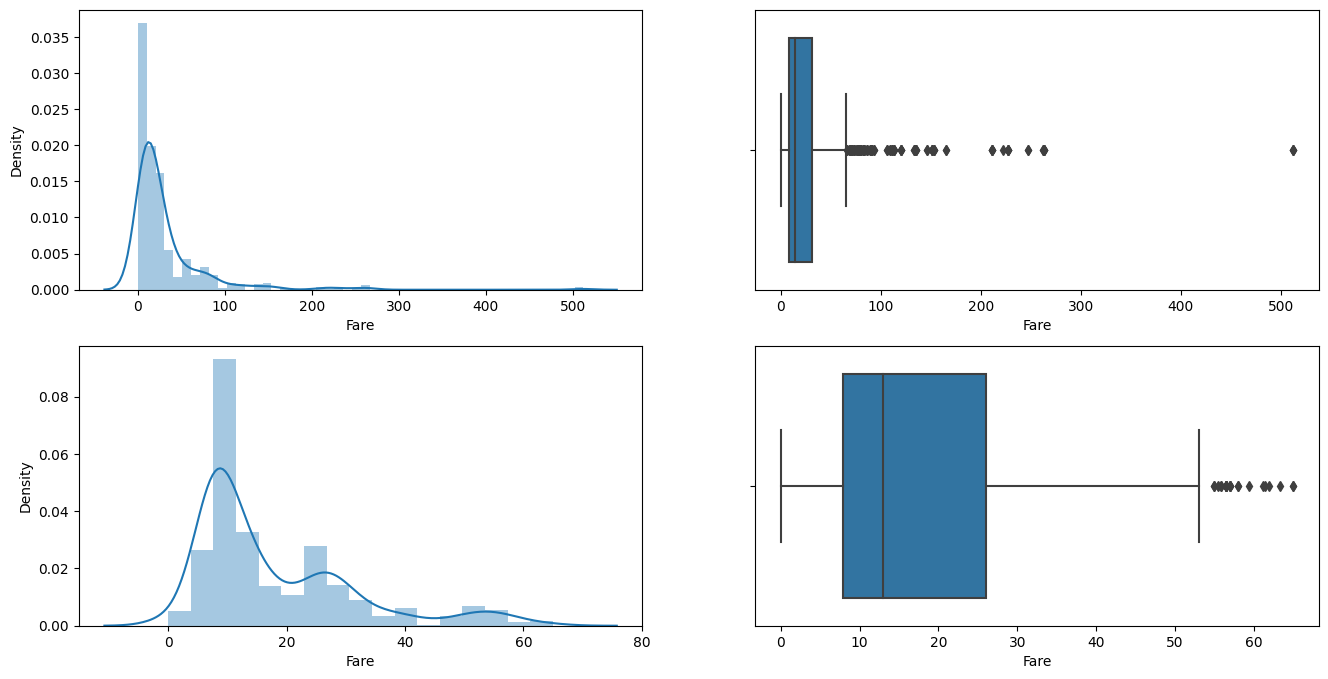

In [57]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['Fare'])

plt.subplot(2,2,2)
sns.boxplot(x=new_df['Fare'])

plt.subplot(2,2,3)
sns.distplot(new_df_iqr_trimed['Fare'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df_iqr_trimed['Fare'])

plt.show()

### Capping

In [61]:
new_df_iqr_capping = new_df.copy()

In [62]:
new_df_iqr_capping["Fare"] = np.where(
    new_df["Fare"] > upper_limit, upper_limit,
    np.where(
        new_df["Fare"] < lower_limit, lower_limit, new_df["Fare"]
    )
)

In [63]:
new_df_iqr_capping.shape

(891, 3)

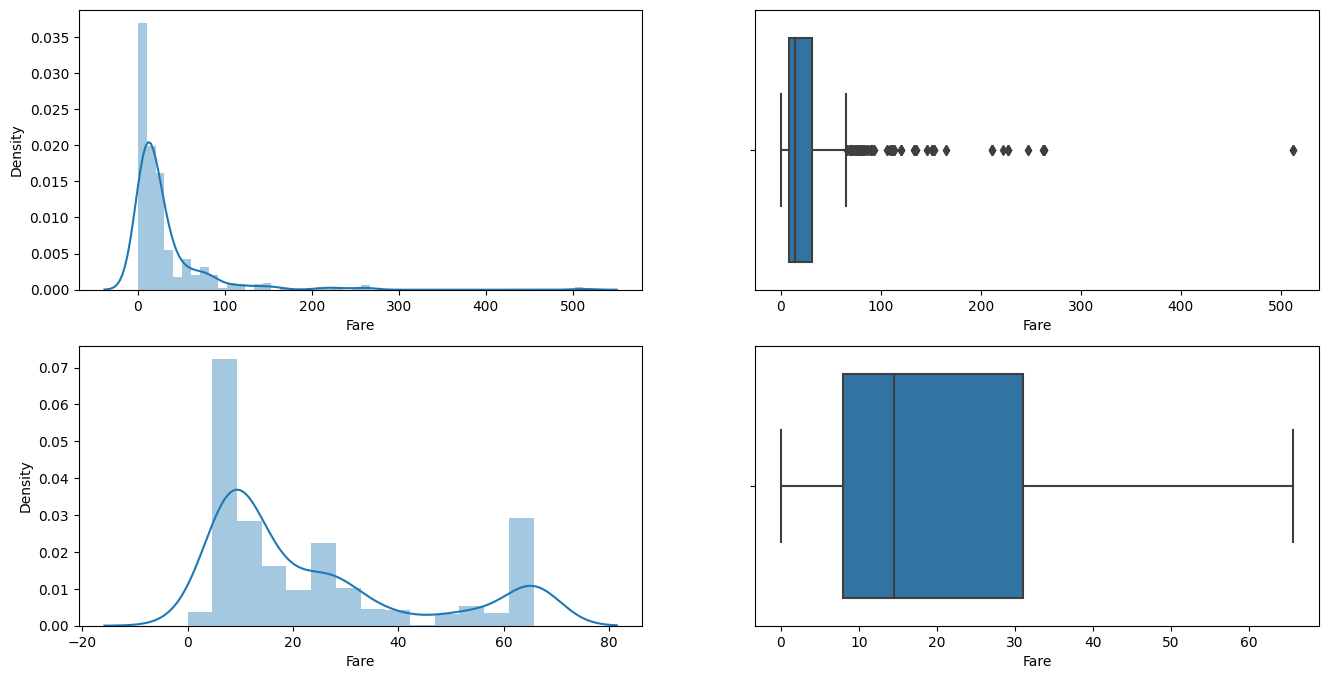

In [64]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['Fare'])

plt.subplot(2,2,2)
sns.boxplot(x=new_df['Fare'])

plt.subplot(2,2,3)
sns.distplot(new_df_iqr_capping['Fare'])

plt.subplot(2,2,4)
sns.boxplot(x=new_df_iqr_capping['Fare'])

plt.show()